## Gather all results after local running blastp

In [12]:
import os
import pandas as pd

# Path to the folder containing text files
folder_path = '/n/home10/ytingliu/blast_res'

# List to store DataFrames
dfs = []

# Iterate through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        # Read only the 1st and 3rd columns from the file into a DataFrame
        df = pd.read_csv(file_path, sep='\t', usecols=[0, 2], header=None, names=['query_id', 'pct_identity'])
        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames into one
result_df = pd.concat(dfs, ignore_index=True)

# Save the concatenated DataFrame as a text file
result_df.to_csv('blastp_result.txt', sep='\t', index=False)  # Adjust file name and separator as needed


In [5]:
# load blastp results
import pandas as pd

file_path = 'blastp_result.txt'

result_df = pd.read_csv(file_path, sep='\t')
result_df

,query_id,pct_identity
0,Q9UY56,39.489
1,Q9UY56,24.757
2,Q9UY56,29.008
3,Q9UY56,26.316
4,Q9UY56,30.263
...,...,...
66498,C3MPT5,38.298
66499,A3DMQ3,44.444
66500,A3DMQ3,41.935
66501,A3DMQ3,40.000


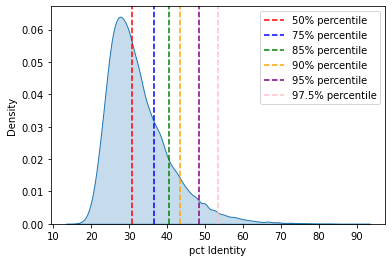

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'column3' contains the data for which you want to draw the density plot
data = result_df['pct_identity']

# Create density plot
sns.kdeplot(data, shade=True)

# Define the list of percentiles and corresponding colors
percentiles = [(50, 'red'), (75, 'blue'), (85, 'green'), (90, 'orange'), (95, 'purple'), (97.5, 'pink')]

# Add vertical lines for each percentile with different colors
for percent, color in percentiles:
    percentile_value = np.percentile(data, percent)
    plt.axvline(percentile_value, color=color, linestyle='--', label=f'{percent}% percentile')

# Set labels and title
plt.xlabel('pct Identity')
plt.ylabel('Density')
\

# Add legend
plt.legend()

# Display the plot
plt.show()




\text{% Identity} = \frac{\text{Number of Identical Positions}}{\text{Total Number of Aligned Positions}} \times 100\%


## Test different negative pct identity bars

In [2]:
# load blastp results
import pandas as pd

file_path = 'blastp_result.txt'

blastp_res = pd.read_csv(file_path, sep='\t')
blastp_res


,query_id,pct_identity
0,Q9UY56,39.489
1,Q9UY56,24.757
2,Q9UY56,29.008
3,Q9UY56,26.316
4,Q9UY56,30.263
...,...,...
66498,C3MPT5,38.298
66499,A3DMQ3,44.444
66500,A3DMQ3,41.935
66501,A3DMQ3,40.000


In [3]:
import numpy as np
import os
import re
from sklearn.metrics import confusion_matrix, accuracy_score
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
warnings.filterwarnings("default")
os.getcwd()
df = pd.read_csv('../dataset/full_updated_data.csv')
df

,jobs,interface,Num_intf_residues,Polar,Hydrophobhic,Charged,contact_pairs,sc,hb,sb,...,iptm,mpDockQ/pDockQ,file_source,label,pred,model_1_multimer_v3_pred_0,model_2_multimer_v3_pred_0,model_3_multimer_v3_pred_0,model_4_multimer_v3_pred_0,model_5_multimer_v3_pred_0
0,2GNJ_1_and_2GNJ_2,C_B,22.0,0.318,0.318,0.273,22.0,0.726,9.0,14.0,...,0.959609,0.512518,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.957888,0.954887,0.953721,0.952660,0.951900
1,1JBP_1_and_1JBP_2,C_B,22.0,0.318,0.318,0.273,22.0,0.718,12.0,16.0,...,0.959037,0.513515,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956872,0.954217,0.954161,0.952466,0.951730
2,3OVV_1_and_3OVV_2,C_B,22.0,0.318,0.318,0.273,22.0,0.725,7.0,14.0,...,0.958931,0.519170,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956851,0.952951,0.952088,0.952080,0.951719
3,2VO3_1_and_2VO3_2,C_B,22.0,0.318,0.318,0.273,22.0,0.725,7.0,14.0,...,0.958905,0.495511,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956646,0.952902,0.951221,0.950663,0.949503
4,2VNW_1_and_2VNW_2,C_B,22.0,0.318,0.318,0.273,22.0,0.729,7.0,15.0,...,0.958796,0.516269,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.956535,0.954254,0.953772,0.951799,0.594339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8252,7DDO_1_and_7DDO_2,C_B,119.0,0.328,0.311,0.185,283.0,0.012,35.0,1.0,...,0.157226,0.707733,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,1.0,0.263660,0.263573,0.261066,0.257602,0.257515
8253,6LZG_2_and_6LZG_1,C_B,67.0,0.388,0.284,0.194,106.0,0.052,12.0,0.0,...,0.150241,0.581248,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.260272,0.258493,0.257715,0.257621,0.248961
8254,7A6O_2_and_7A6O_1,C_B,16.0,0.375,0.188,0.313,16.0,0.160,4.0,7.0,...,0.148244,0.084546,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.243742,0.231274,0.230923,0.222313,0.219328
8255,7EOW_1_and_7EOW_2,C_B,33.0,0.303,0.182,0.424,50.0,0.179,12.0,5.0,...,0.141367,0.215266,/n/holyscratch01/ramanathan_lab/yuting/outputs...,1.0,0.0,0.230280,0.228237,0.228042,0.226219,0.217530


In [4]:
data = blastp_res['pct_identity']
percentiles = []
import numpy as np 
percents = [50, 75, 85, 90, 95, 97.5]
for percent in percents:
    percentiles.append(np.percentile(data, percent))

In [5]:
def data_processing(blastp_res, df, percent):
    blasp_data = blastp_res['pct_identity']
    percentile = np.percentile(blasp_data, percent)
    grouped = blastp_res.groupby('query_id')
    filtered_groups = grouped.filter(lambda x: x['pct_identity'].max() < percentile)
    target_ids = filtered_groups['query_id'].unique()
    filtered_rows = pd.DataFrame()
    for archaea in target_ids:
        matching_jobs = df[df['jobs'].str.contains(archaea)]
        filtered_rows = pd.concat([filtered_rows, matching_jobs[matching_jobs['label'] == 0]])
    filtered_df = pd.concat([filtered_rows, df[df['label'] == 1]])
    return filtered_df

In [6]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def svm_train_crossval_test(df):
   selected_columns = ['Num_intf_residues', 'Polar', 'Hydrophobhic',
      'Charged', 'contact_pairs', 'sc', 'hb', 'sb', 'int_solv_en',
      'int_area', 'mpDockQ/pDockQ', 'pi_score', 'model_1_multimer_v3_pred_0',
      'model_2_multimer_v3_pred_0', 'model_3_multimer_v3_pred_0',
      'model_4_multimer_v3_pred_0', 'model_5_multimer_v3_pred_0']
   X = df[selected_columns]
   y = df.label.astype(int)
   scaler = StandardScaler()
   X = scaler.fit_transform(X)
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)
   class_weight = {0: (df['label'].sum())/(len(df)-df['label'].sum()), 1: 1} 
   # Train
   svm_classifier = SVC(kernel='linear', C=0.1, class_weight=class_weight)
   svm_classifier.fit(X_train, y_train)

   # Validation
   
   # Test
   y_pred = svm_classifier.predict(X_test)
   n_support_vectors = len(svm_classifier.support_vectors_)
   y_pred = svm_classifier.predict(X_test)
   print("Test Acc: ", accuracy_score(y_test, y_pred))
   print(confusion_matrix(y_test, y_pred))
   tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
   fpr = fp/(fp+tn) 
   print("Test FPR: ", fpr)
   report = classification_report(y_test, y_pred)
   print("Classification Report: ")
   print(report)

   print("Number of Support Vectors: ", len(svm_classifier.support_vectors_))
   print("Hyperplane Complexity: ", len(svm_classifier.support_vectors_)/len(X_train))
   return [n_support_vectors, accuracy_score(y_test, y_pred), fpr, len(svm_classifier.support_vectors_)/len(X_train)]

In [7]:
results = []
percents = [50, 75, 85, 90, 95, 97.5]
for p in percents:
    filtered_df = data_processing(blastp_res, df, percent=p)
    results.append(svm_train_crossval_test(filtered_df))

# Extract results for plotting
accuracies = [result[1] for result in results]
fprs = [result[2] for result in results]
n_support_vectors = [result[0] for result in results]
complexity = [result[3] for result in results]

Test Acc:  0.8868980963045913
[[ 22   1]
 [100 770]]
Test FPR:  0.043478260869565216
Classification Report: 
              precision    recall  f1-score   support

           0       0.18      0.96      0.30        23
           1       1.00      0.89      0.94       870

    accuracy                           0.89       893
   macro avg       0.59      0.92      0.62       893
weighted avg       0.98      0.89      0.92       893

Number of Support Vectors:  454
Hyperplane Complexity:  0.12717086834733893
Test Acc:  0.9131293188548865
[[141   2]
 [ 86 784]]
Test FPR:  0.013986013986013986
Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.99      0.76       143
           1       1.00      0.90      0.95       870

    accuracy                           0.91      1013
   macro avg       0.81      0.94      0.85      1013
weighted avg       0.94      0.91      0.92      1013

Number of Support Vectors:  554
Hyperplane Complexit

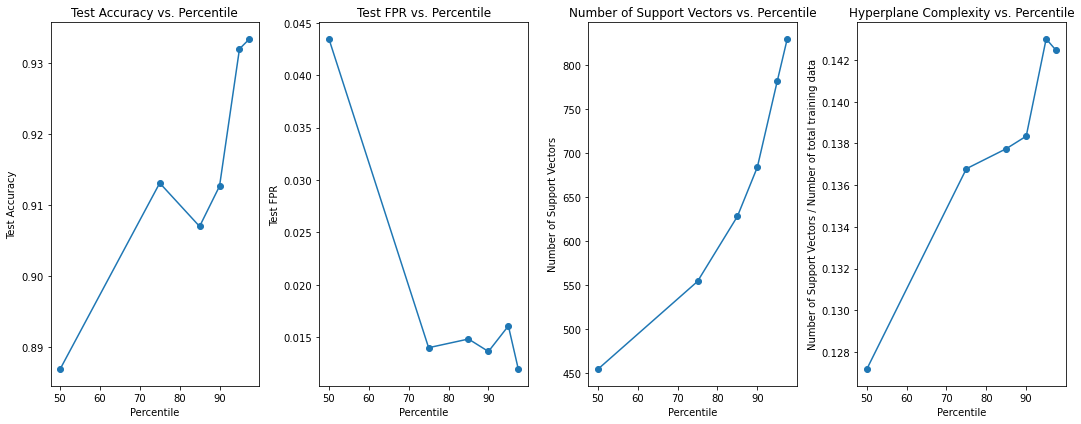

In [8]:
# Plotting
plt.figure(figsize=(15, 6))

plt.subplot(1, 4, 1)
plt.plot(percents, accuracies, marker='o')
plt.xlabel('Percentile')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Percentile')

plt.subplot(1, 4, 2)
plt.plot(percents, fprs, marker='o')
plt.xlabel('Percentile')
plt.ylabel('Test FPR')
plt.title('Test FPR vs. Percentile')

plt.subplot(1, 4, 3)
plt.plot(percents, n_support_vectors, marker='o')
plt.xlabel('Percentile')
plt.ylabel('Number of Support Vectors')
plt.title('Number of Support Vectors vs. Percentile')

plt.subplot(1, 4, 4)
plt.plot(percents, complexity, marker='o')
plt.xlabel('Percentile')
plt.ylabel('Number of Support Vectors / Number of total training data')
plt.title('Hyperplane Complexity vs. Percentile')

plt.tight_layout()
plt.show()